<a href="https://colab.research.google.com/github/rosie0520486/zomato0525/blob/main/zomato0523_rosie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

＃データ前処理

In [2]:
import pandas as pd
import numpy as np

# Data quality check function
def check_data_quality(df, X, y):
    print("[1] Dataset shape (rows, columns):")
    print(df.shape)

    print("\n[2] Missing values summary:")
    nulls = df.isnull().sum()
    if nulls.sum() == 0:
        print("→ No missing values")
    else:
        print(nulls[nulls > 0].sort_values(ascending=False))

    print("\n[3] Data type summary:")
    print(df.dtypes.value_counts())

    print("\n[4] Summary statistics (numeric features):")
    numeric_cols = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_cols.empty:
        print(numeric_cols.describe().T[['mean', 'std', 'min', 'max']].round(2))
    else:
        print("No numeric columns to summarize.")

    print("\n[5] Target variable distribution (y):")
    print(y.value_counts())
    print("→ Class proportion (%):")
    print((y.value_counts(normalize=True) * 100).round(2))

    print("\n[6] Feature matrix dimensions (X):")
    print(f"X.shape = {X.shape}")
    print("→ First 5 features:", X.columns[:5].tolist())


# Preprocessing function
def preprocess_zomato_data(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)

    selected_columns = [
        'book_table', 'online_order', 'location', 'rest_type',
        'cuisines', 'approx_cost(for_two_people)', 'rate'
    ]
    df = df[selected_columns].copy()

    df.dropna(subset=['book_table'], inplace=True)
    df.loc[:, 'book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})
    df.loc[:, 'online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})

    df.loc[:, 'approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].astype(str)
    df.loc[:, 'approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].str.extract(r'(\d+\.?\d*)')
    df.loc[:, 'approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].astype(float)
    df.loc[:, 'approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].fillna(
        df['approx_cost(for_two_people)'].mean()
    )

    df.loc[:, 'rate'] = df['rate'].replace(['NEW', '-', ''], None)
    df.loc[:, 'rate'] = df['rate'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)
    df.loc[:, 'rate'] = df['rate'].fillna(df['rate'].mean())

    for col in ['location', 'rest_type', 'cuisines']:
        df.loc[:, col] = df[col].fillna('Unknown')
        df = pd.get_dummies(df, columns=[col], drop_first=True)

    X = df.drop('book_table', axis=1)
    y = df['book_table']
    return X, y, df

# File loading and execution
file_path = '/content/drive/My Drive/zomato.csv'
df_raw = pd.read_csv(file_path, low_memory=False)

X, y, df_processed = preprocess_zomato_data(df_raw)
check_data_quality(df_processed, X, y)


<ipython-input-2-acebf4cd019c>:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].fillna(
<ipython-input-2-acebf4cd019c>:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'rate'] = df['rate'].fillna(df['rate'].mean())


[1] Dataset shape (rows, columns):
(55943, 11381)

[2] Missing values summary:
book_table      4226
online_order    4226
dtype: int64

[3] Data type summary:
bool      11377
object        4
Name: count, dtype: int64

[4] Summary statistics (numeric features):
No numeric columns to summarize.

[5] Target variable distribution (y):
book_table
0.0    45268
1.0     6449
Name: count, dtype: int64
→ Class proportion (%):
book_table
0.0    87.53
1.0    12.47
Name: proportion, dtype: float64

[6] Feature matrix dimensions (X):
X.shape = (55943, 11380)
→ First 5 features: ['online_order', 'approx_cost(for_two_people)', 'rate', 'location_ ""RATED\\n  ....this place has this vibes of old Banglore pub', 'location_ ""RATED\\n  1-Ambience good but could have been managed better\\n\\n2- Food was delicious\\n\\n3- Service was pathetic. Every time you need to call them for water']


＃前処理２

In [3]:
import pandas as pd
import numpy as np

# --- 1. data quality check
def check_data_quality(df, X, y):
    print("[1] Dataset shape (rows, columns):")
    print(df.shape)

    print("\n[2] Missing values summary:")
    nulls = df.isnull().sum()
    if nulls.sum() == 0:
        print("→ No missing values")
    else:
        print(nulls[nulls > 0].sort_values(ascending=False))

    print("\n[3] Data type summary:")
    print(df.dtypes.value_counts())

    print("\n[4] Summary statistics (numeric features):")
    numeric_cols = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_cols.empty:
        print(numeric_cols.describe().T[['mean', 'std', 'min', 'max']].round(2))
    else:
        print("No numeric columns to summarize.")

    print("\n[5] Target variable distribution (y):")
    print(y.value_counts())
    print("→ Class proportion (%):")
    print((y.value_counts(normalize=True) * 100).round(2))

    print("\n[6] Feature matrix dimensions (X):")
    print(f"X.shape = {X.shape}")
    print("→ First 5 features:", X.columns[:5].tolist())

# --- 2. 前処理
def preprocess_zomato_data(df):
    # Clean column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)

    # Select key columns
    selected_columns = [
        'book_table', 'online_order', 'location', 'rest_type',
        'cuisines', 'approx_cost(for_two_people)', 'rate'
    ]
    df = df[selected_columns].copy()

    # Drop rows with missing target or key features
    df.dropna(subset=['book_table', 'online_order'], inplace=True)

    # Convert to binary (1 = Yes, 0 = No)
    df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})
    df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})

    # Clean and convert approx cost
    df['approx_cost(for_two_people)'] = (
        df['approx_cost(for_two_people)']
        .astype(str)
        .str.extract(r'(\d+\.?\d*)')[0]
        .astype(float)
    )
    df['approx_cost(for_two_people)'] = df['approx_cost(for_two_people)'].fillna(
        df['approx_cost(for_two_people)'].mean()
    )

    # Clean and convert rate
    df['rate'] = df['rate'].astype(str).replace(['NEW', '-', ''], None)
    df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)', expand=False)
    df['rate'] = df['rate'].astype(float)
    df['rate'] = df['rate'].fillna(df['rate'].mean())

    # Reduce high-cardinality categorical features
    for col in ['location', 'rest_type', 'cuisines']:
        top_categories = df[col].value_counts().nlargest(30).index
        df[col] = df[col].where(df[col].isin(top_categories), other='Other')
        df[col] = df[col].fillna('Other')

    # One-hot encode cleaned categorical columns
    df = pd.get_dummies(df, columns=['location', 'rest_type', 'cuisines'], drop_first=True)

    # Split into features and target
    X = df.drop('book_table', axis=1)
    y = df['book_table']
    return X, y, df

# --- 3. ファイルよぶと実行 ---
file_path = '/content/drive/My Drive/zomato.csv'
df_raw = pd.read_csv(file_path, low_memory=False)

X, y, df_processed = preprocess_zomato_data(df_raw)
check_data_quality(df_processed, X, y)


[1] Dataset shape (rows, columns):
(55943, 94)

[2] Missing values summary:
book_table      4226
online_order    4226
dtype: int64

[3] Data type summary:
bool       90
float64     4
Name: count, dtype: int64

[4] Summary statistics (numeric features):
                               mean     std  min     max
book_table                     0.12    0.33  0.0     1.0
online_order                   0.59    0.49  0.0     1.0
approx_cost(for_two_people)  349.98  229.11  0.0  2015.0
rate                           3.70    0.42  0.5     5.0

[5] Target variable distribution (y):
book_table
0.0    45268
1.0     6449
Name: count, dtype: int64
→ Class proportion (%):
book_table
0.0    87.53
1.0    12.47
Name: proportion, dtype: float64

[6] Feature matrix dimensions (X):
X.shape = (55943, 93)
→ First 5 features: ['online_order', 'approx_cost(for_two_people)', 'rate', 'location_Banashankari', 'location_Banaswadi']


#holdout

In [5]:
from sklearn.model_selection import train_test_split

# Ensure no missing values in y and corresponding rows in X
X_clean = X[y.notna()]
y_clean = y[y.notna()]

# Split into training and test sets (80% train, 20% test), preserving class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean  # maintain class ratio in both sets
)

# Check results
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape    :", X_test.shape, y_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True).round(3))
print("Test class distribution:\n", y_test.value_counts(normalize=True).round(3))


Training set shape: (41373, 93) (41373,)
Test set shape    : (10344, 93) (10344,)
Train class distribution:
 book_table
0.0    0.875
1.0    0.125
Name: proportion, dtype: float64
Test class distribution:
 book_table
0.0    0.875
1.0    0.125
Name: proportion, dtype: float64


#クラス分布

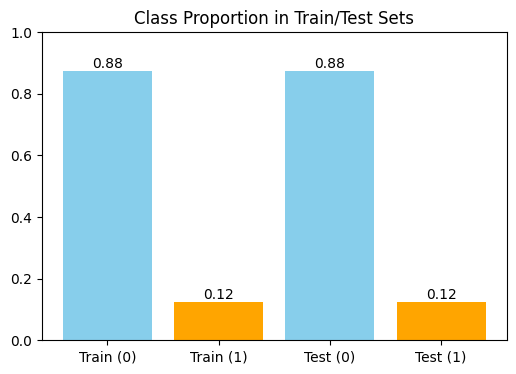

In [6]:
import matplotlib.pyplot as plt

# Bar plot for train/test class balance
plt.figure(figsize=(6, 4))
bars = plt.bar(['Train (0)', 'Train (1)', 'Test (0)', 'Test (1)'],
        [
            (y_train == 0).mean(),
            (y_train == 1).mean(),
            (y_test == 0).mean(),
            (y_test == 1).mean()
        ],
        color=['skyblue', 'orange', 'skyblue', 'orange']
)
plt.title('Class Proportion in Train/Test Sets')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f"{height:.2f}", ha='center')
plt.show()


#ベースラインモデル

In [8]:
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict all 0s (majority class)
y_pred_baseline = np.zeros_like(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_baseline)
f1 = f1_score(y_test, y_pred_baseline, average='binary', zero_division=0)
mae = mean_absolute_error(y_test, y_pred_baseline)
mse = mean_squared_error(y_test, y_pred_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_baseline)

# Output
print("=== Baseline Model (Predict All 0) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f} (for reference only)")


=== Baseline Model (Predict All 0) ===
Accuracy : 0.8753
F1 Score : 0.0000
MAE      : 0.1247
RMSE     : 0.3531
R²       : -0.1425 (for reference only)


＃logistics regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Define the logistic regression model (handle class imbalance)
logreg = LogisticRegression(
    class_weight='balanced',   # give more weight to minority class
    max_iter=1000,
    random_state=42
)

# 2. Train the model
logreg.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = logreg.predict(X_test)

# 4. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 5. Print metrics
print("=== Logistic Regression Performance ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f} (for reference only)")

# 6. Confusion matrix & classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


=== Logistic Regression Performance ===
Accuracy : 0.8618
F1 Score : 0.6282
MAE      : 0.1382
RMSE     : 0.3718
R²       : -0.2665 (for reference only)

Confusion Matrix:
[[7706 1348]
 [  82 1208]]

Detailed Classification Report:
              precision    recall  f1-score   support

         0.0     0.9895    0.8511    0.9151      9054
         1.0     0.4726    0.9364    0.6282      1290

    accuracy                         0.8618     10344
   macro avg     0.7310    0.8938    0.7716     10344
weighted avg     0.9250    0.8618    0.8793     10344



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#改善

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix
import numpy as np

# 1. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Model with higher iteration limit
logreg = LogisticRegression(
    class_weight='balanced',
    max_iter=3000,
    random_state=42
)

# 3. Train the model
logreg.fit(X_train_scaled, y_train)

# 4. Predict and evaluate
y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Logistic Regression (Scaled & Converged) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f} (reference only)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


=== Logistic Regression (Scaled & Converged) ===
Accuracy : 0.8619
F1 Score : 0.6276
MAE      : 0.1381
RMSE     : 0.3717
R²       : -0.2656 (reference only)

Confusion Matrix:
[[7711 1343]
 [  86 1204]]

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9890    0.8517    0.9152      9054
         1.0     0.4727    0.9333    0.6276      1290

    accuracy                         0.8619     10344
   macro avg     0.7308    0.8925    0.7714     10344
weighted avg     0.9246    0.8619    0.8793     10344



#ランダムフォレスト

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. モデル　定義（クラス　調整）
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',   # 少数修正
    random_state=42,
    n_jobs=-1
)

# 2. モデル学習
rf_model.fit(X_train, y_train)

# 3. 予測
y_pred_rf = rf_model.predict(X_test)

# 4. 指標計算
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='binary', zero_division=0)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

# 5. プリント
print("=== Random Forest Performance ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f} (reference only)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=4))


=== Random Forest Performance ===
Accuracy : 0.9830
F1 Score : 0.9348
MAE      : 0.0170
RMSE     : 0.1304
R²       : 0.8441 (reference only)

Confusion Matrix:
[[8907  147]
 [  29 1261]]

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9968    0.9838    0.9902      9054
         1.0     0.8956    0.9775    0.9348      1290

    accuracy                         0.9830     10344
   macro avg     0.9462    0.9806    0.9625     10344
weighted avg     0.9841    0.9830    0.9833     10344



#xgboost

In [13]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. データ変更
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # 불균형 보정
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 2. モデル学習
xgb_model.fit(X_train, y_train)

# 3. 予測
y_pred_xgb = xgb_model.predict(X_test)

# 4. 評価指標計算
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='binary', zero_division=0)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

# 5. プリント
print("=== XGBoost Performance ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f} (reference only)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:29:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost Performance ===
Accuracy : 0.9284
F1 Score : 0.7702
MAE      : 0.0716
RMSE     : 0.2676
R²       : 0.3437 (reference only)

Confusion Matrix:
[[8361  693]
 [  48 1242]]

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9943    0.9235    0.9576      9054
         1.0     0.6419    0.9628    0.7702      1290

    accuracy                         0.9284     10344
   macro avg     0.8181    0.9431    0.8639     10344
weighted avg     0.9503    0.9284    0.9342     10344



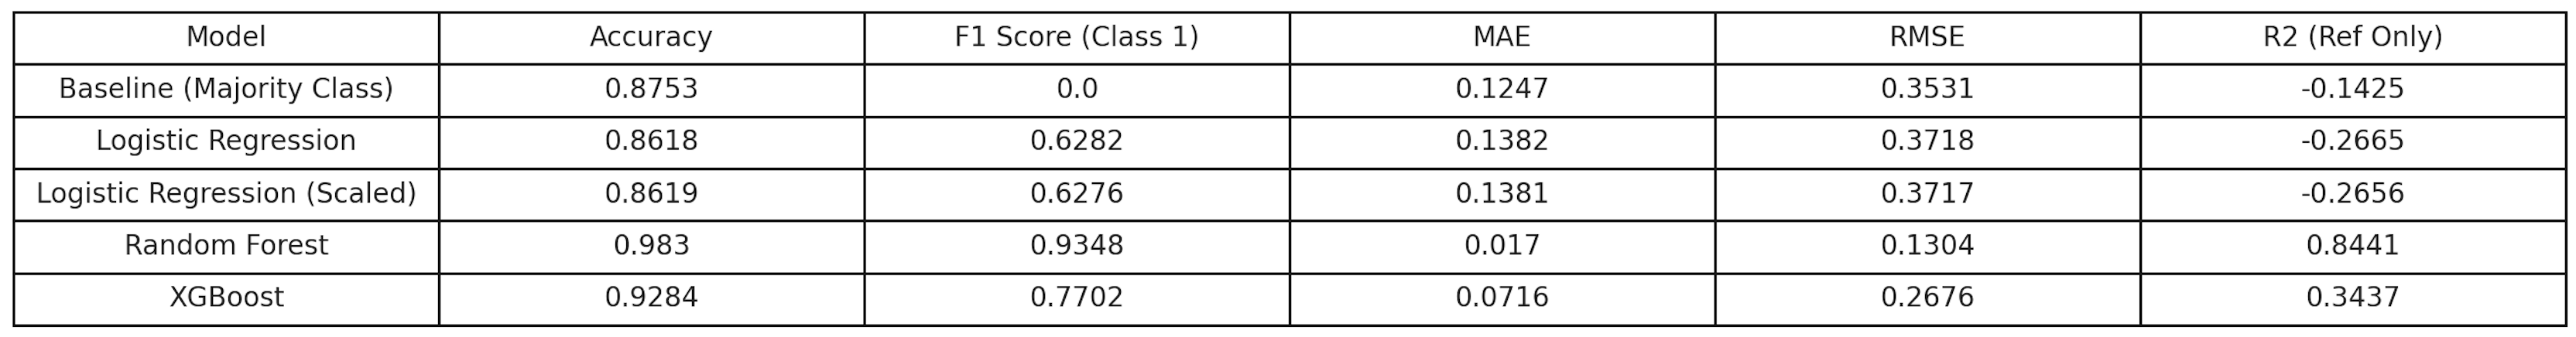

#モデル比較

<ipython-input-2-0e147d970c5d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-2-0e147d970c5d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-2-0e147d970c5d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-2-0e147d970c5d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


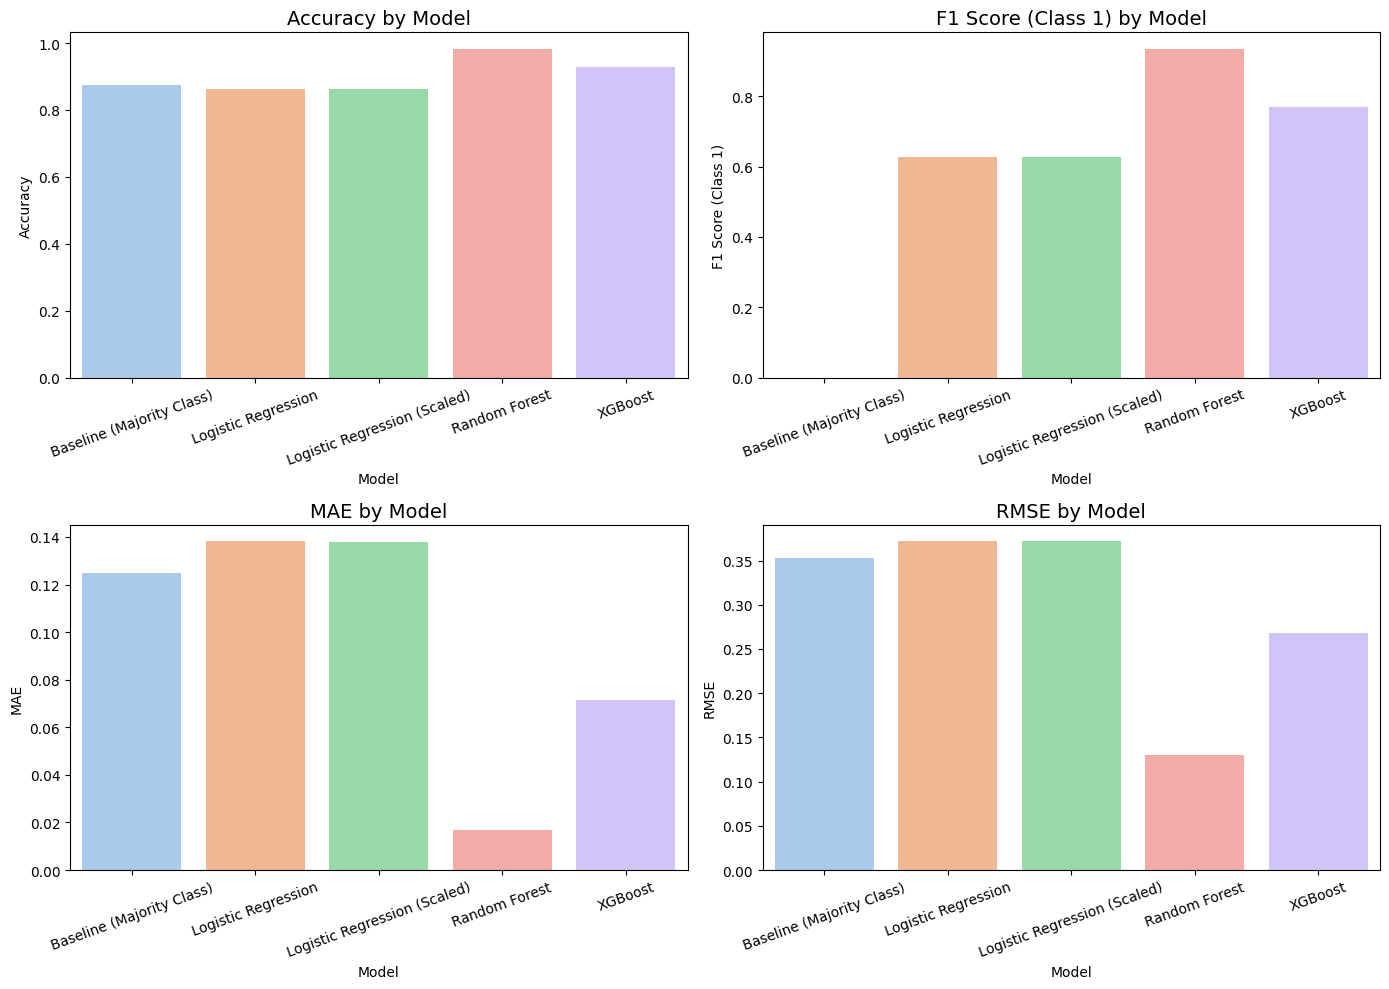

In [2]:
import pandas as pd

model_results = pd.DataFrame({
    "Model": [
        "Baseline (Majority Class)",
        "Logistic Regression",
        "Logistic Regression (Scaled)",
        "Random Forest",
        "XGBoost"
    ],
    "Accuracy": [
        0.8753,
        0.8618,
        0.8619,
        0.9830,
        0.9284
    ],
    "F1 Score (Class 1)": [
        0.0000,
        0.6282,
        0.6276,
        0.9348,
        0.7702
    ],
    "MAE": [
        0.1247,
        0.1382,
        0.1381,
        0.0170,
        0.0716
    ],
    "RMSE": [
        0.3531,
        0.3718,
        0.3717,
        0.1304,
        0.2676
    ],
    "R2 (Ref Only)": [
        -0.1425,
        -0.2665,
        -0.2656,
        0.8441,
        0.3437
    ]
})

import matplotlib.pyplot as plt
import seaborn as sns

#  DataFrame: model_results
metrics_to_plot = ["Accuracy", "F1 Score (Class 1)", "MAE", "RMSE"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics_to_plot):
    sns.barplot(
        x="Model",
        y=metric,
        data=model_results,
        ax=axes[idx],
        palette="pastel"
    )
    axes[idx].set_title(f"{metric} by Model", fontsize=14)
    axes[idx].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


＃Confusion Matrix

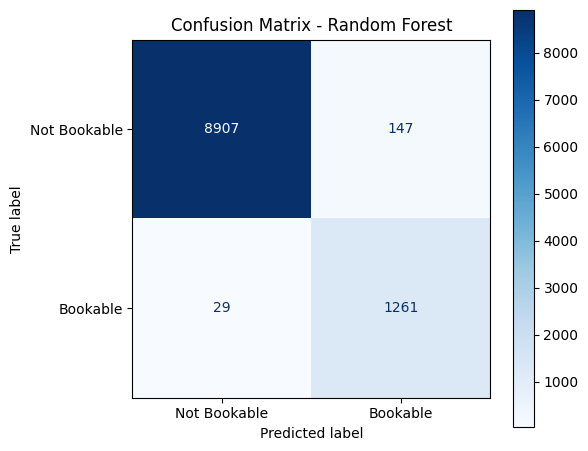

<ipython-input-3-c7e8f1a5c349>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perm_importances.values, y=perm_importances.index, palette="crest")


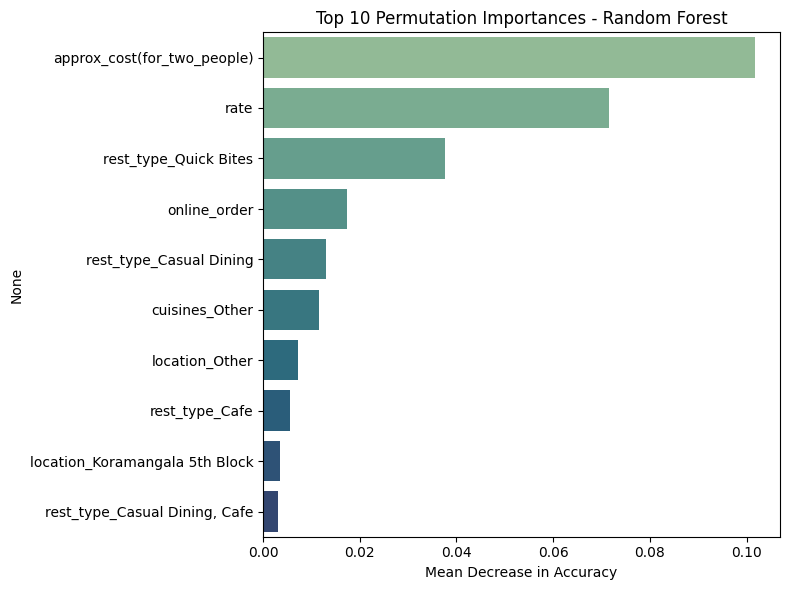

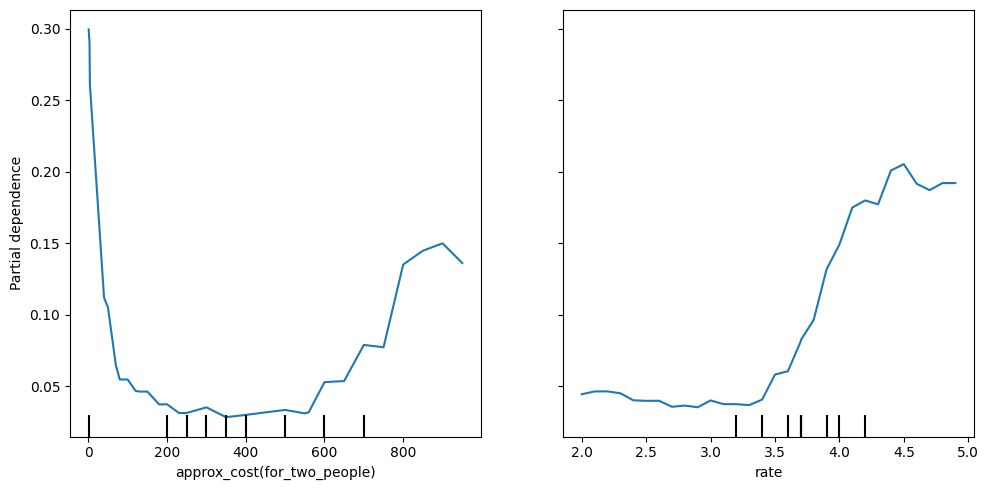

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# 2. prediction
y_pred_rf = rf_model.predict(X_test)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Bookable", "Bookable"])
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

# 4. Permutation Importance
perm_result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
perm_importances = pd.Series(perm_result.importances_mean, index=X_test.columns).sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=perm_importances.values, y=perm_importances.index, palette="crest")
plt.title("Top 10 Permutation Importances - Random Forest")
plt.xlabel("Mean Decrease in Accuracy")
plt.tight_layout()
plt.show()

# 5. Partial Dependence Plot
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(
    rf_model, X_test,
    features=["approx_cost(for_two_people)", "rate"],
    feature_names=X_test.columns,
    ax=ax
)
plt.tight_layout()
plt.show()


